# Introduction to Bayesian Statistics and Inference in Python

## Before We Get Started


**Basic Material**: 
Material will come from selections from the following sources. Feel free to follow along or refer back to later.
* Think Bayes, https://greenteapress.com/wp/think-bayes/ 
* Bayesian Methods for Hackers https://camdavidsonpilon.github.io/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/
* Information Theory, Inference and Learning Algorithms https://www.ece.uvic.ca/~agullive/Mackay.pdf 

**More advanced references for further reading**:
* Bayesian Data Analysis, Gelman et. al http://www.stat.columbia.edu/~gelman/book/ 
* Statistical Rethinking: A Bayesian Course with Examples in R and Stan, McElreath https://xcelab.net/rm/statistical-rethinking/
* Towards a Principled Bayesian Workflow and prerequisites, Betancourt https://betanalpha.github.io/writing/ 

Materials for this course inspired/taken from Think Bayes, Bayesian Methods for Hackers, and Statistical Rethinking.

### Installation Instructions:
Before coming to class please install the packages using the following commands:

```pip install thinkbayesx```

If pip is not found, please conda install pip first then run the command above.

# Basic Probability and Bayes Rule for Brief Review

We will start with some basic ideas of probability. In the simplest cases, this is literally just counting.

<img src="probability_A.svg">

$$P(A) = \frac{\# A}{\#A+\#B}$$

<img src="probably_A|B.svg">

$$P(A \& B) = \frac{\# A \& B}{\#A + \#B} $$
Note order doesn't matter
$$P(A|B) = \frac{\# A \& B}{\#B}$$
But remember 
$$P(B) = \frac{\# B}{\#A + \#B}$$
Then we can see $$P(A \& B) = P(A|B)P(B)$$
Also $$P(B \& A) = P(B|A)P(A)$$
Therefore, $$P(B|A)=\frac{P(A|B)P(B)}{P(A)}$$
This is bayes rule.

What is bayesian statistics?  In short it is bayes'rule applied for statistical inference.

Sometimes this is rewritten as 

$$\frac{P(B|A)P(A)}{P(B|A)P(A)+P(B|A^c)P(A^c)}=P(A|B)$$, which is the same thing.

## Intuition Behind Bayes Rule and Some Bayesian Terminology
Let's label the variables differently. 

We call B now D, meaning data, and A now H meaning a particular hypothesis.

We then have: 

$$\frac{P(D|H)P(H)}{P(D)}=P(H|D)$$

We have names for each part of this:

$P(D|H)$ we call the **likelihood**.

$P(H)$ we call the **prior**.
    
$P(D)$ we call the normalizing constant, which is just the probability of the data occuring.
    
$P(H|D)$ we call the **posterior**

This tells us that if we know the likelihood of the data occuring, and have a prior, we can get the posterior of the data, which reflects what we expect our hypothesis to be given the observed data. Compare this to empirical likelihood methods, which just tell us the probability of generating a particular sequence of data given a hypothesis.

This is also useful, if we have information about $P(B|A)$ and want to find out information about $P(A|B)$

In general, we ignore the normalizing constant, because it just converts the product of the likelihood and prior into probabilities and it is easy to find given we know our generated data and the different hypotheses we were  considering. Thus, we often say:

$$likelihood \times prior \propto posterior$$

##  PMFs and PDFs/Examples

We now consider some practical examples that will help clarify this concept. We will explore this from a few different perspectives using PDFs and PMFs.

### Example 1: 
We first consider the case of balls from two different bowls. The first bowl has 10 white balls, and 30 black balls, the second bowl has 20 balls of each. We draw a ball and it is black. What is the probability that we draw from the first bowl?

We can do this purely mathematically with bayes' rule.

#### Derivation with Bayes' Rule

We want to find $P(\text{bowl 1}|\text{ball is black})$. We can get this from Bayes' Rule directly:

$$P(\text{ball from bowl 1}|\text{ball is black})=\frac{P(\text{ball is black}|\text{ball from bowl 1})P(\text{ball from bowl 1})}{P(\text{ball is black})}$$

We know that:

$$P(\text{ball is black}|\text{ball from bowl 1})=30/(10+30)=3/4$$

$$P(\text{ball from bowl 1})=40/(40+40)=1/2$$

$$P(\text{ball is black})=(30+20)/(40+40)=5/8$$

Thus, $$P(\text{ball from bowl 1}|\text{ball is black})=\frac{3/4*1/2}{5/8}=3/5$$

Note here, once again, 5/8 is acting as a normalizing constant that gives the chance of drawing a black ball period, whereas the top gives us the chance of drawing a black ball from bowl 1. Thus, we are really counting the number of black balls from bowl 1 and then normalizing by the number of black balls overall, to give us the chance of drawing a ball from bowl 1 given the ball is black (note we could have gotten it directly this way by diving 30 by 50.) 

Note also that 5/8 in the denominator is really just 3/8 chance of drawing a black ball that is from  bowl one, plus the chance of drawing a black ball that is from bowl 2 (2/8). This is the second formulation of bayes' rule we talked about earlier using complements.

#### Derivation with ThinkBayes Software

We now do the same calculation, except now using the thinkbayes software to show how it works.

First, though, we will show off some  basic properties of thinkbayes.

#### Constructing a PMF Object and some basic properties

First, we import thinkbayes

In [1]:
%matplotlib inline
from numba import jit
import matplotlib.pyplot as plt
import thinkbayes2 as tb
import thinkstats2 as ts
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('seaborn')

Now we construct our first PMF. A PMF (probability mass function) as you probably remember from statistics, is a map from a set of outcomes to their probabilities. We will consider the PMF for a six sided die.
We initialize the object 'd6' our six sided die.

In [2]:
d6=tb.Pmf()

Now we have to assign values to each of the six sides. Since we will weight all sides equally, we will assign them all the value 1. If we didn't want to put weight on one side, we would assign it value 0. The object underlying this is a dictionary that maps outcomes to values, with some added methods.

In [3]:
for i in range(1,7):
       d6[i]=1 

In [4]:
print(d6)
d6[1]
# We can print outcomes using the 'Print method'
d6.Print()

Pmf({1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1})
1 1
2 1
3 1
4 1
5 1
6 1


Now we use the 'normalize' method that each pmf object has to convert the values to probabilities. Normalize works by taking each of the values we assigned the object, summing across the values and dividing by the sum. This ensures that the sum of the values always add up to 1, which creates the probabilities.

In [5]:
d6.Normalize()
d6[2]

0.16666666666666666

This converted it to 1/6 as expected. Now, we can do  some more interesting things. First, let's plot these. To do this, we use the 'Hist' method that is built into thinkplot, which creates a histogram.

We can calculate the mean with the 'Mean' method (as long as we normalize first. )

In [6]:
d6.Mean()

3.5

We can also select a random value with the 'Random' method with the correct probabilities.


In [7]:
d6.Random()

3

Finally, using Hist from thinkbayes, we can plot this histogram.

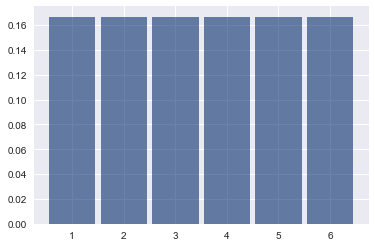

In [8]:
tb.thinkplot.Hist(d6)

### Exercise 1:

Thinkbayes includes an \_add\_ (+) function that enables you to calculate the sum of two PMFs. Please print the histogram of the sum of numbers from two six-sided fair dice and the mean of the two dice.

In [9]:
# Solution goes here.

### Exercise 2: 

Suppose I tell you that I roll two dice and the outcome of the two rolls is larger than 3. Please plot the histogram of the PMF for the probability distribution conditional on the fact that I observe an outcome larger than 2 and report the mean of the outcomes $E(\text{dice sum}|\text{dice sum}>2)$. 

In [11]:
# Solution goes here.

### Example 2: Reanalyzing the Bowl Example

We will now do the bowl example again and show how easy it is to solve in thinkbayes.

First, we define our prior. Note if not specified, thinkbayes assumes equal weight on each object.

In [13]:
ballsfrombowl=tb.Pmf(['bowl 1','bowl 2']) #prior
ballsfrombowl.Print() 

bowl 1 0.5
bowl 2 0.5


Now we update by our likelihood. To do this, we use the '\*=' operator, which multiplies each object by whatever you feed it. In our case this will represent the likelihood.

In [14]:
ballsfrombowl['bowl 1']*=(3/4) #probability of a black ball from bowl 1
ballsfrombowl['bowl 2']*=(1/2) #probability of a black ball from bowl 2

In [15]:
ballsfrombowl.Normalize() #normalizing constant in denominator

0.625

bowl 1 0.6000000000000001
bowl 2 0.4


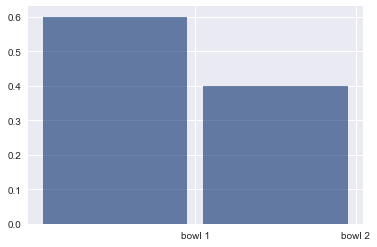

In [16]:
ballsfrombowl.Print()  #posterior values
tb.thinkplot.Hist(ballsfrombowl)

Note these are the exact same results we got previously. 

### Exercise 3

Now suppose we replace the black ball we drew and draw again from the **same bowl**, this time getting a white ball. What is the probability that we drew first a black ball then a white ball from bowl 1? Use thinkbayes and the '\*=' operator to calculate this probability

In [17]:
# Solution goes here.

### Suites and Classes

Suppose we had a bunch of non-identical, mutually exclusive and collectively exhaustive set of *hypotheses* we wanted to consider, like bowls in the previous problem, but didn't want to spend all of our time multiplying likelihoods out one by one like before to take into account differences between them. We can represent these as **suites**. Suites are mainly useful in thinkbayes for defining **classes** of objects that make our life a lot easier. We will consider two brief examples where this will be useful. 

### Example 4

Suppose instead of having 2 six-sided dice, we had one four-sided die, one six-sided die, one eight-sided die, and one 12-sided die. Suppose we observe a six. What is the probability that the six came from each of the dice? Let's solve this using  suites and classes.


4 0.0
6 0.4444444444444445
8 0.33333333333333337
12 0.22222222222222224


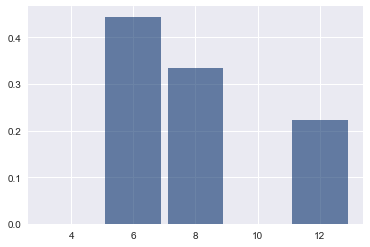

In [20]:
#solution 1

suite=tb.Suite([4,6,8,12])
suite[4]=0 #no 6 on 4 sided die
suite[6]=(1/6)
suite[8]=(1/8)
suite[12]=(1/12)
suite.Normalize()
suite.Print()
tb.thinkplot.Hist(suite)

Note that this is cumbersome. Let's try something a bit easier and automate the process of finding the likelihood by defining a **class**. Our class will be an exntension of the suite class, and automatically comes with an 'Update' method. We just need to provide a likelihood method for computing the likelihood.

#### Exercise 4:

Fill in the outline for the class below. We want it to compute the likelihood for each die, given a data (observed outcome), and a hypothesis (some known information about the dice).

Once this is filled it, it automatically provides a built in Update function via the Suite. Note that you only need to provide the likelihood. The fairdice will 'inherit' the update method (and some other methods we aren't using) from suite.

The update function is 

```{python3}
def Update(self,data):
    for hypo in self.Values():
        like=self.Likelihood(data,hypo)
        self[hypo] *= like
    
    self.Normalize()
```

In [53]:
#solution goes here
class fairdice(tb.Suite):
    # hypo is number of sides on the die
    # data is the outcome
    def Likelihood(self,data,hypo):
    # fill in this
    # HINT: You should check and make sure the data occurs at all given the hypo (# of sides)
        return ...

Now we create a dice object and update it. 

In [23]:
fairdice=Fairdice([4,6,8,12]) 
fairdice.Update(6) #normalizes and calculates posterior automatically.
fairdice.Print()

4 0.0
6 0.4444444444444445
8 0.33333333333333337
12 0.22222222222222224


We can do even further updates.

In [24]:
for roll in [8,7,7,5,4]:
    fairdice.Update(roll)
fairdice.Print()

4 0.0
6 0.0
8 0.9192938209331653
12 0.08070617906683476


#### PDFs and Updating

We will now explore one of the most famous historical problems in statistics, called the **German Tank Problem** and use modern computational tools from ThinkBayes to solve it easily. It turns out it is nearly equivalent to the dice problem. 


Setting: it is World War II and the US (along with other nations like China and Great Britian) is at war with Germany. The Allies have captured records indicating that the Germans are producing tanks in blocks of 100 sequential numbers per month with not all numbers necessarily used. The Allies recently captured a tank bearing the number 13. They want to estimate how many numbers were used in this block. To solve this, we will use a thinkbayes class again


<img src="Panzer_I_Norway.PNG">
Source: US National Archives

In [25]:
class Tank(tb.Suite):
    #hypo is the number of tanks
    # data is the observed serial number
    def Likelihood(self,data,hypo):
        if data>hypo:
            return 0
        else:
            return 1/hypo

Now, we just use a range for the suite object. Here are the posterior probabilities


Mean: 42.22310725570888
Median: 35


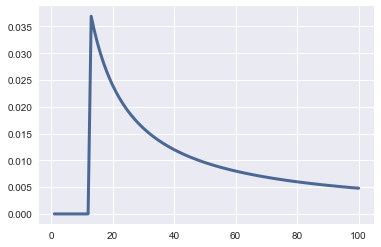

In [26]:
tank=Tank(range(1,101))
tank.Update(13) #normalizes and calculates posterior automatically.
tb.thinkplot.Pdf(tank)
print('Mean:',tank.Mean())
print('Median:',tank.Median())

So if we just wanted to guess the mean, we would guess they had made about 42 tanks, while if we wanted the median we would have guessed 35 tanks. What is the maximum likelihood estimate? The PDF here shows the continous distribution that corresponds to our posterior. 

Now suppose we observe another tank with number 37. What are our new estimates?

Mean: 58.056534230793154
Median: 54


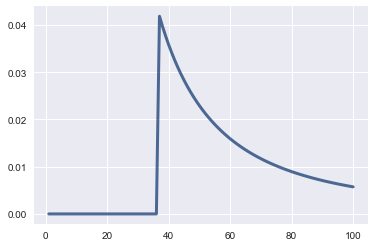

In [27]:
tank.Update(37)
tb.thinkplot.Pdf(tank)
print('Mean:',tank.Mean())
print('Median:',tank.Median())

As you can also see, we can also use bayesian inference for PDFs, which loosely are continuous versions of a PMF (a map from a continuum of values to a density now, rather than a probability. The densities, however, integrate to probabilities.)

Note also, that when we update, we take the previous posterior as our new prior. We then multiply by a new likelihood and generate a new posterior.

How has this posterior changed from the previous update?|

### Exercise 5:

Take the tank problem, but suppose there are first 200, then 1000, then 10000 possibilities. Given the two updates from before, plot the pdfs of these graphs and report the means and medians. What happens in the limit to the median as the number of possibilities goes to infinity? What is thte maximum of the posterior? Is this what you expected?

In [54]:
# solution goes here

### Adding in a different prior. 

Suppose instead of a uniform prior, we had a pareto distribution (sometimes called a power-law distribution) that puts more weight on less observations. A simplified formula for a pareto distribution that starts at 0 is $f(x)=x^{-\alpha}$  What would our posterior look like now? 

We can choose a different prior by using the \_init\_ method inside our tank class. We demonstrate this below.

In [30]:
class Tank2(tb.Suite):
    #hypo is the number of tanks
    # data is the observed serial number
    
    
    # our prior 
    def __init__(self, hypos, alpha=1.0):
        """Initializes the hypotheses with a power law distribution.
        hypos: sequence of hypotheses
        alpha: parameter of the power law prior
        """
        tb.Pmf.__init__(self)
        for hypo in hypos:
            self.Set(hypo, hypo**(-alpha))
        self.Normalize()
        

    def Likelihood(self,data,hypo):
        if data>hypo:
            return 0
        else:
            return 1/hypo

def MakePosterior(high, dataset, constructor=Tank): ## automatically generates a posterior
    """Solves the tank problem.
    
    high: int maximum number of tank
    dataset: sequence of observed train numbers
    constructor: function used to construct the Tank object
    
    returns: Tank object representing the posterior suite
    """
    hypos = range(1, high+1)
    suite = constructor(hypos)

    for data in dataset:
        suite.Update(data)

    return suite

Let's see how this changes our results. We will also show how you can plot multiple plots at the same time.

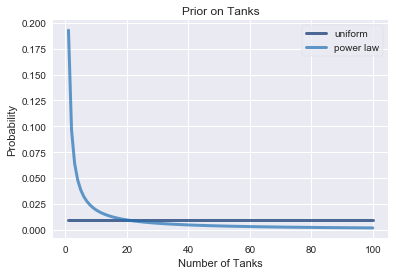

In [31]:
high = 100
hypos = range(1, high+1)
suite1 = Tank(hypos) #uniform
suite2 = Tank2(hypos) #power law
suite1.label='uniform'
suite2.label='power law'
#priors
tb.thinkplot.Pdf(suite1)
tb.thinkplot.Pdf(suite2)
tb.thinkplot.Config(title="Prior on Tanks", xlabel='Number of Tanks',ylabel="Probability")


Now let's observe our first tank

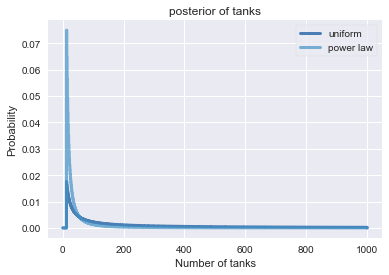

In [32]:
dataset = [13]
high = 1000 #max observation.

tb.thinkplot.PrePlot(num=2) #number of graphs

constructors = [Tank, Tank2] #tells classes to use
labels = ['uniform', 'power law']


for constructor, label in zip(constructors, labels): #zip returns iterable of tuples
    suite = MakePosterior(high, dataset, constructor) #generates posterior automatically given data, high and the class type by running update
    suite.label = label #assigns label
    tb.thinkplot.Pmf(suite)

tb.thinkplot.Config(title="posterior of tanks", xlabel='Number of tanks',
                 ylabel='Probability')


Now we look at the mean and median for this problem after observing 13,and 37 numbered tanks

In [33]:
dataset = [13,37]
for high in [500, 1000, 2000,10000,100000,1000000]:
    suite = MakePosterior(high, dataset, Tank2)
    print('Mean ', high, suite.Mean())
    print('Median ', high, suite.Median())

Mean  500 68.04641878039395
Median  500 51
Mean  1000 70.43922797262216
Median  1000 52
Mean  2000 71.70083587043216
Median  2000 52
Mean  10000 72.74361188704168
Median  10000 52
Mean  100000 72.98248919765109
Median  100000 52
Mean  1000000 73.00646443705355
Median  1000000 52


Unlike before, we now have both the mean and median of the posterior converging. The median is now 52, while the mean seems to be converging to ~73

### Credible Intervals
Finally, we can compute the so-called  credible interval, which we can think of as a bayesian analogue to the confidence interval. This tells us where we expect our observations to fall x% of the time given our data. Here we will calculate the bounds below which we expect our data to fall 5% of the time and above which we expect our data to fall 5% of the time. We return to the uniform prior with one observation of 13.

In [34]:
hypos = range(1, 1001)
suite = Tank(hypos)
suite.Update(13)

suite.Percentile(5), suite.Percentile(95)

(16, 804)

We can see for the uniform case that our 90% credible interval is (16,804) We can also plot the cdf.

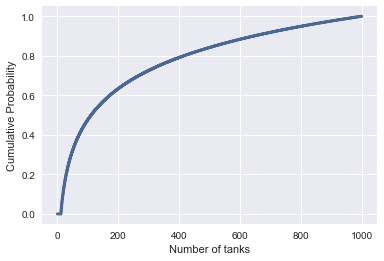

In [35]:
cdf = tb.Cdf(suite)
tb.thinkplot.Cdf(cdf)
tb.thinkplot.Config(xlabel='Number of tanks',
                 ylabel='Cumulative Probability',
                 legend=False)

### Exercise 6

Please plot the CDF and the 90% and 95% credible interval for the Tank problem with 1000 possible tanks with the powerlaw prior after observing 13 tanks. How does it compare to the uniform prior case? Why?

In [ ]:
# solution goes here

## Choosing a prior

There are several different ways we can think about choosing a prior? Any suggestions? 


1. One option is to choose a prior that tells us nothing that the data doesn't already tell us. This is a so-called uninformative prior. The most commonly used prior of this type is called Jeffrey's prior, and lies beyond the scope of this class. However, we rarely want to use this in practice. Why?

2. The second type is a prior that makes the problem really about the likelihood. This makes the bayesian method equivalent to some of the 'frequentist' likelihood methods you learned previously. This actually carries some additional information, however,  as it tells you the range of the variables. It is not totally uninformative.

3. The third option is to use so-called 'expert information'. What do you think this means?

4. The fourth option is to use a so-called regularizing prior. If we observe less data than the variables we have or only slightly more data than as variables, we oftentimes want to reduce the number of variables we can use. This 'ties our hands' and prevents us from overfitting the data. We can do this in bayesian statistics.

5. The fifth option is to use some aspect of the data or previously observed data to inform our estimates. For example, suppose we know the mean and variance of the data from a previous example. It turns out the 'least informative' prior given that we know that additional information is a normal prior with that mean and variance. For any statistic we know, there are lists online that give the least informative variable. These are sometimes referred to as 'weakly informative' priors.

6. Finally, we can cheat and make our lives easier. It turns out there are some priors that given a likelihood from some distribution, produce a posterior from the same distribution family as the prior. This makes computing the prior trivial. These are called 'conjugate priors'. 
**Example**: if we have a normal prior and normal likelihood, we get a normal posterior.  
**Example 2**: If we have a beta prior with a binomial likelihood, it turns out our posterior is also from a beta distribution. We can plug this into a calculator and instantly get any answer we want and know the shape of the entire distribution without doing anything fancy. 

### Monte Carlo Simulation

Now for something completely different. Suppose we have a difficult problem. We want to numerically estimate $\pi$. How can we do this?

As you probably remember, we know that the area of a unit circle is exactly $\pi$. We will take advantage of this. Consider the first quadrant of the circle, which we know has area $\pi/4$. We will try the following algorithm: 

Take a random  draw of $\left(x,y\right) \sim \text{Uniform}[0,1]\times \text{Uniform}[0,1]$. This is a uniform draw from the unit square. If that number satisfies $x^2+y^2\leq 1$, we will give it the value 1. Otherwise we will give it the value 0.

The probability of a point falling inside the unit square is 1. The probability of a point falling inside $x^2+y^2\leq 1$ is $A(circle)/A(square) = \pi/4$. If we take the mean of our points (sum their value and divide by the number), we get $$E(points) =  (1*P(circle)+0*P(not in circle))$$ which can be approximated by the sample average $$\# \text{samples in circle}/\#\text{ samples}$$. In the limit as $n$ goes to infinity, we expect that our sample average will go exactly to $\pi/4$, which if we multiply this by 4, we exactly get the value of $\pi$.

We will try implementing this below and see if it works.

### Exercise 7: 

Try writing out this monte carlo simulation and graphing the result. 

In [55]:
# solution goes here

The Monte Carlo method is useful for Bayesian statistics, because oftentimes it can be difficult to analytically find the posterior. 

In those cases, we can use Monte Carlo to simulate what the distribution looks like. You will see an example of this on your homework.


### Homework Problems

#### HW 1: Solving the Monty Hall problem

<img src="Monty_open_door.svg.png">
Source: Wikipedia

We have the following problem. Suppose that you have 3 doors. Behind 2 of the doors are goats, but behind one of the doors is a Ferrari. You want the Ferrari. The game works as follows. First, you can choose a door at random. Then, the game-host will open one of the other doors containing a goat. You have the option to switch doors to the remaining door or keep the door you started with.

What is the probability of the Ferrari being behind the door you could switch to? What about the one you started with?

What is the best strategy? Should you switch, stay with your door, or does it not matter?

(Hint: Use thinkbayes to solve this problem. What is the prior here? What is the likelihood? )

(Hint 2: Consider the case where you choose door 1. The likelihood is what is the probability of door 3 being opened given the different possible positions of the car?) 


In [ ]:
# you can put solution here or in new notebook with the imported libraries called at the top of this notebook

#### HW 2: Flipping a coin with a PMF

Suppose we have a coin that has the following property. You flip a coin 10 times and get 8 heads in the order HTHHHHHHTH. Implement a class that represents all the possibilities of a possibly biased coin by extending a suite in thinkbayes. Start with a $\text{Uniform}[0,1]$ prior. Then, update sequentially. Plot the posterior probability density function at each update over p, the probability of getting heads. What happens to the distribution over time? What is the probability that the coin has a greater than 50% chance of heads (hint: use the CDF)? What is the mean, and median of these estimates? 

Hint: for any coin that has n flips, the coin will have a likelihood from the binomial distribution. You can look up the formula for the likelihood of the binomial online. Remember that in a likelihood, $p$ is variable while the parameters are fixed.


Now suppose, we started with a $\text{Beta}(2,2)$ prior.  Plot the posterior distribution at each update and report the mean. How does this change the resulting posterior distribution from the uniform case. (Hint, for the beta prior, you can use thinkbayes but you don't need to. You can use the beta distribution built into numpy noting that the beta is a conjugate prior for the binomial. You can find the formula for how the binomial updates at [Wikipedia](https://en.wikipedia.org/wiki/Conjugate_prior).)

In [ ]:
# you can put solution here or in new notebook with the imported libraries called at the top of this notebook

#### HW 3: Monty Hall Continued
Your friend doesn't believe that Bayesian methods work and still doesn't believe the result you got for Monty Hall. You want to prove to your friend that they do. We will convince them numerically. Let's write a Monte Carlo simulation program that will prove that the results you got in the Monty Hall problem are accurate. Simulate the probabilities of the car being behind the door you can switch to and the door you chose over 1000 runs and prove that these results converge to the probability estimates you got earlier. Plot the probability from each of these runs. Remember that in Monte Carlo, the probabilities are sample averages of the runs.  (Note: the famous mathematician Paul Erdős was only convinced of the accuracy of the results after seeing this simulation.) 

In [ ]:
# you can put solution here or in new notebook with the imported libraries called at the top of this notebook